# BlackScholesPricer Example

## Basics

Option class is the QuantForm library's implementation for a vanilla European (equity) option. While many pricer could be implemented for it, this example introduces the BlackScholesPricer

In [1]:
# Setup for the notebook
from quantform.pylib import QfDate
from quantform.pylib.equity.utils import parse_option_id, form_option_id
from quantform.pylib.surface import PriceSurface

from quantform.pylib.equity.derivative import Option
Option

quantform.pylib.equity.derivative.Option.Option

Market traded options use special identifiers that carry all of the necessary information to define the option. The utility functions 'parse_option_id' and 'form_option_id' make working with the option identifiers easy. A hypothetical option id can be defined as

In [2]:
ticker        = "HYPO"  # Arbitrary (hypothetical) ticker symbol
maturity_date = QfDate(2025, 12, 31)  # Use the default calendar (Frankfurt) and convention (Business/252) for now
option_type   = "Call"  # The option type. Either 'Call' or 'Put'
strike        = 100     # The strike price

option_id = form_option_id(ticker, maturity_date, option_type, strike)
print(f"Option ID: {option_id}")

Option ID: HYPO251231C00100000


The Option object itself is easy to define with the option id

In [3]:
risk_free_rate = 0.05  # Define an arbitrary (annual) risk-free rate
volatility     = 0.20  # Define an arbitrary (annual) volatility

option = Option(option_id, *parse_option_id(option_id), risk_free_rate, volatility=volatility)
print(repr(option))

Contract: HYPO251231C00100000
Pricer: Black-Scholes Pricer
Option Type: Call
Maturity Date: 2025-12-31
Strike: 100.0
Risk-free Rate: 0.05
Volatility: 0.2


Pricing the option is then as simple as calling the Option instance with the wanted parameters

In [4]:
underlying_value = 100
report_date = QfDate(2025, 6, 15)

option_price = option(underlying_value, report_date)
print(f"Value of the option on {report_date} when the value of underlying is {underlying_value}: {option_price}")

Value of the option on 2025-06-15 when the value of underlying is 100: 7.300142856557294


The sensitivities are likewise easy to calculate. Note that not all sensitivities are currently supported (TODO: check)

In [5]:
delta = option.delta(underlying_value, report_date)
vega  = option.vega(underlying_value, report_date)
gamma = option.gamma(underlying_value, report_date)

print(f"Sensitivities on {report_date} when value of underlying is {underlying_value}")
print(f"Delta: {delta}")
print(f"Vega: {vega}")
print(f"Gamma: {gamma}")

Sensitivities on 2025-06-15 when value of underlying is 100
Delta: 0.6025454474485946
Vega: 28.64472631294972
Gamma: 0.025965723132601905


The option implied probability is also straightforward to compute, but requires accessing the BlackScholesPricer object

In [6]:
market_price = 6  # Arbitrary choice for the options market price

implied_vol = option.pricer.implied_volatility(market_price, underlying_value, report_date)

print(f"Option implied volatility for market price {market_price}: {implied_vol}")

Option implied volatility for market price 6: 0.15440686949729918


The option could also be initialised with the market parameters in which case the volatility will be replaced by the computed implied volatility

In [7]:
option2 = Option(option_id, *parse_option_id(option_id), risk_free_rate, 
                 market_price=market_price, underlying_value=underlying_value, report_date=report_date)

print(repr(option2))

Contract: HYPO251231C00100000
Pricer: Black-Scholes Pricer
Option Type: Call
Maturity Date: 2025-12-31
Strike: 100.0
Risk-free Rate: 0.05
Volatility: 0.15440686949729918


The option price as a function of the underlying and the time to maturity can be visualised using a PriceSurface object that is built on the GenericSurface class introduced in the example '03_surface_example.ipynb'

/home/kasper/GIT/quantform/src/quantform/pylib/equity/pricer/BlackScholesPricer.py:129: RuntimeWarning: divide by zero encountered in log
  (np.log(underlying_value / self.__strike) + (self.__rf + self.__vol ** 2 / 2) * \


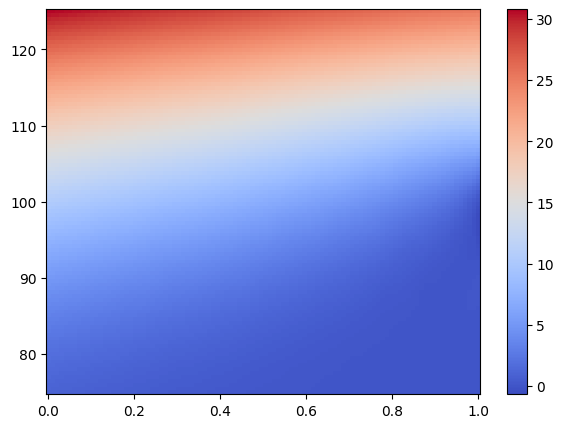

In [8]:
surf = PriceSurface(option, (25, 25))
fig  = surf.plot((100, 100), ((0, 1), (75, 125)))